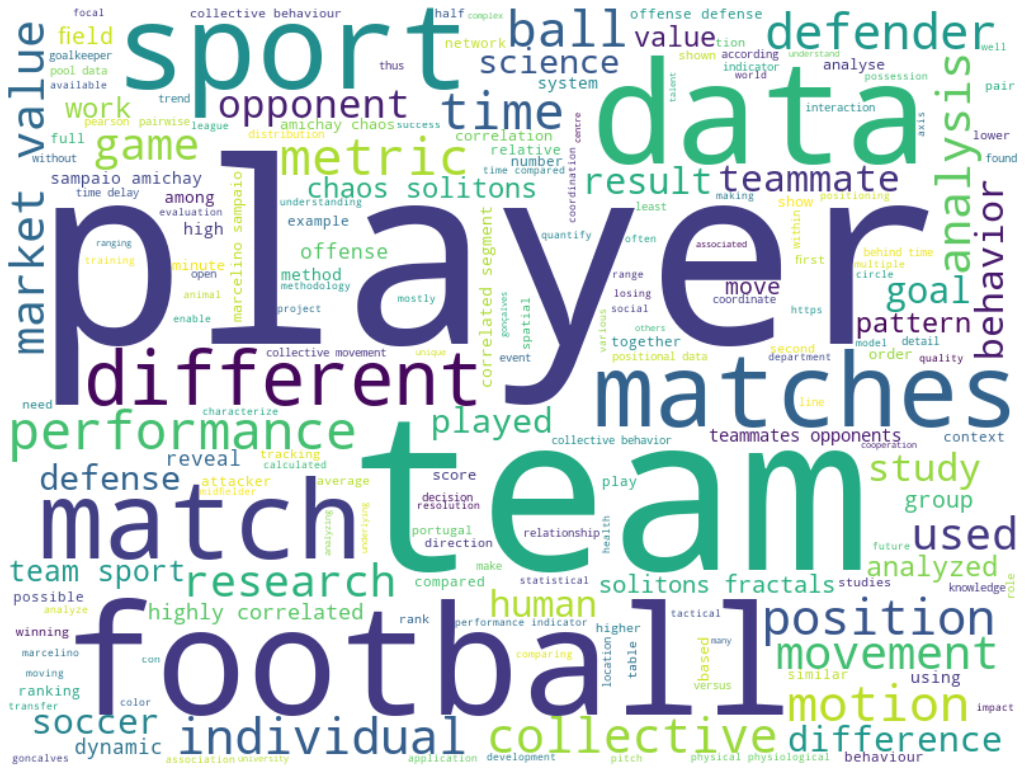

<Figure size 432x288 with 0 Axes>

In [76]:
'''
1. import a .pdf file
2. remove stopwords
3. create a corpus of word that have more than 3 characters
4. Make a wordcloud with figsize=(20, 14)
'''

# 1. import a .pdf file
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# open the pdf file
pdfFileObj = open('/content/drive/MyDrive/OpenAI-Test/Collective.pdf', 'rb')

# read the pdf file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# get the number of pages
num_pages = pdfReader.numPages
count = 0
text = ""

# extract the text from each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count += 1
    text += pageObj.extractText()

# if the text is encrypted
if text != "":
    text = text

# close the pdf file
pdfFileObj.close()

# 2. remove stopwords
# tokenize the text
tokens = word_tokenize(text)

# convert the text to lowercase
tokens = [w.lower() for w in tokens]

# remove stopwords
words = [word for word in tokens if word not in stopwords.words('english')]

# 3. create a corpus of word that have more than 3 characters
corpus = [word for word in words if len(word) > 3]

# 4. Make a wordcloud with figsize=(20, 14)
wordcloud = WordCloud(width=800, height=600, max_font_size=200, background_color='white').generate(' '.join(corpus))
plt.figure(figsize=(20, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('/content/drive/MyDrive/OpenAI-Test/wordCloud.eps')  # save the figure as a .png file

#5. Plot the Most Common Words in that file, with plotly
word_dist = nltk.FreqDist(corpus)
rslt = pd.DataFrame(word_dist.most_common(19),
                    columns=['Word', 'Frequency'])

fig = go.Figure(
    data=[go.Bar(x=rslt.Word, y=rslt.Frequency)],
    layout_title_text="Top 10 Words in the file"
)
fig.show()

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<FreqDist with 1157 samples and 3001 outcomes>


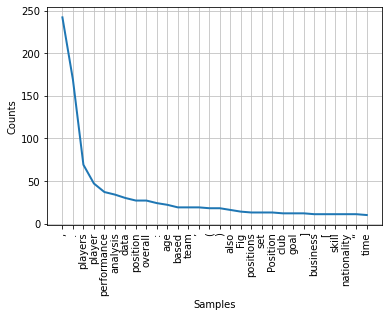

In [9]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# 1. import a .txt file

file = open('/content/drive/MyDrive/Text.txt', 'r')

# 2. create a corpus of word, without stopwords

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(file.read())

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# 3. Plot the Most Common Words in that file

fdist = FreqDist(filtered_sentence)

print(fdist)

fdist.plot(30, cumulative=False)

plt.show()

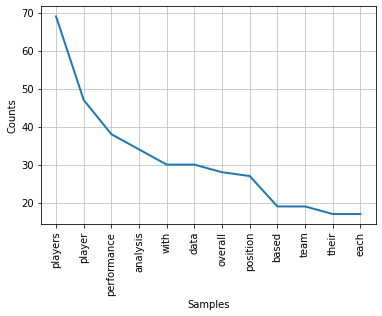

In [18]:

import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

corpus_root = '/content/drive/MyDrive/OpenAI-Test/'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

#print(wordlists.fileids())
#print(wordlists.words('C:/Users/user/Desktop/NLP/text.txt'))

#import a .txt file
text = wordlists.words('/content/drive/MyDrive/OpenAI-Test/Text.txt')

#create a corpus of word that have more than 3 characters
text_3 = [w for w in text if len(w) > 3]

#Plot the Most Common Words in that file
fdist = FreqDist(text_3)
fdist.plot(12)
plt.show()

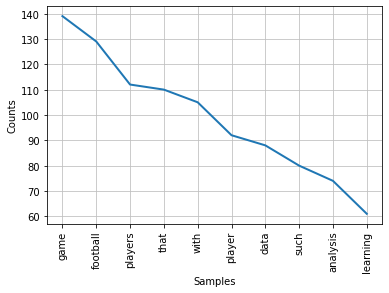

In [13]:

import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

corpus_root = '/content/drive/MyDrive/OpenAI-Test/'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

#print(wordlists.fileids())
#print(wordlists.words('C:/Users/user/Desktop/NLP/text.txt'))

#import a .txt file
text = wordlists.words('/content/drive/MyDrive/OpenAI-Test/Text_1.txt')

#create a corpus of word that have more than 3 characters
text_3 = [w for w in text if len(w) > 3]

#Plot the Most Common Words in that file
fdist = FreqDist(text_3)
fdist.plot(10)
plt.show()

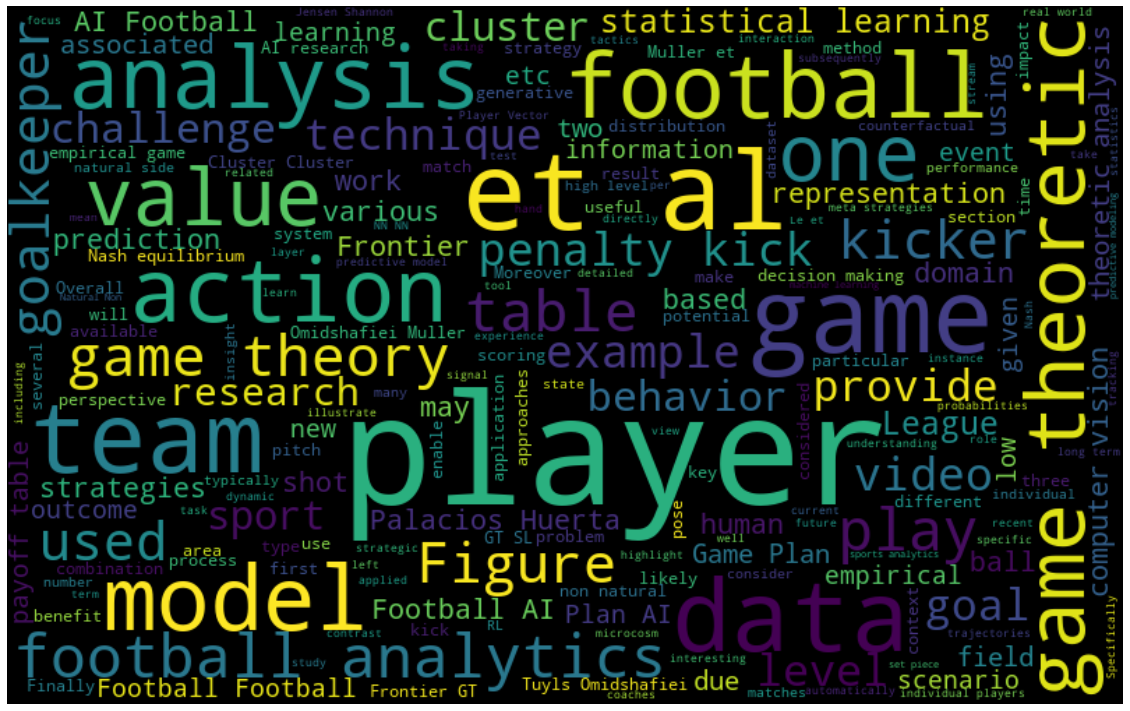

In [50]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#1. import a .txt file
file = open('/content/drive/MyDrive/OpenAI-Test/Text_1.txt', 'r')
text = file.read()

#2. remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#3. create a corpus of word that have more than 3 characters
filtered_sentence = [w for w in filtered_sentence if len(w) > 3]

#4. Plot the Most Common Words in that file, with plotly
word_dist = nltk.FreqDist(filtered_sentence)
rslt = pd.DataFrame(word_dist.most_common(10),
                    columns=['Word', 'Frequency'])

fig = go.Figure(
    data=[go.Bar(x=rslt.Word, y=rslt.Frequency)],
    layout_title_text="Top 10 Words in the file"
)
fig.show()

#5. Make a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(20, 14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()